* Domain task: **Imagenet**
* Target task: **CIFAR-10**
* Pre-train model: **VGG16**

## Experiment 1
Use the feature extractor **output of pretrain model** to produce laten space, then concatenate with the original model  
acc: 0.795  
loss: 0.9464669375022655

## Experiment 2
Use the feature extractor **from every output of convolutional layers** of pretrain model to produce laten space, then concatenate with the original model  
acc: 0.7734  
loss: 0.9581621086956785

## Experiement 3
Get the output of feature extractor from pretrain model, freeze all layers and train the top model. After that, unfreeze all layer and fine-tune the model  
acc: 0.4778  
loss: 1.4958488912238042

## Experiement 4
Use extracted features from output of each conv block and feed to corresponding conv blocks of new model (concatenate with the current ones). The pre-train model can be trainable or non-trainable  
acc: 0.8193  
loss: 0.698373294539816

## Experiment 5
Same as **Experiment 4** but keep the rest of conv blocks and apply GAP, then concatenate with the output of new model (freeze of fine tune first $7$ layers)  
acc: 0.7975  
loss: 0.7668102605718647

## Experiment 6
Same as **Experiment 4**, combining finetune first $7$ layers and use the last conv layer of pretrain model feeding to a new classifier, then we ensemble with the classifier of new model  
acc: 0.8124  
loss: 0.7575436492246583

## Experiment 7
Same as **Experiment 4**, but freeze all layers of pretrain model, the rest of conv blocks feeding to classifier, then ensamble all  
acc: 0.6258  
loss: 1.0767300821033248

In [113]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


with open('/data/Quan/datasets/cifar10/transfer_idea1_history.hdf5', 'rb') as dt:
    exp_1_history_64 = pickle.load(dt)

with open('/data/Quan/datasets/cifar10/transfer_idea1_32_history.hdf5', 'rb') as dt:
    exp_1_history_32 = pickle.load(dt)

# with open('/data/Quan/datasets/cifar10/transfer_idea2_history.hdf5', 'rb') as dt:
#     exp_2_history_64 = pickle.load(dt)
    
with open('/data/Quan/datasets/cifar10/transfer_idea12_32_history.hdf5', 'rb') as dt:
    exp_2_history_32 = pickle.load(dt)
    
with open('/data/Quan/datasets/cifar10/transfer_idea12_freezed_history.hdf5', 'rb') as dt:
    exp_3_history_freezed_64 = pickle.load(dt)
    
with open('/data/Quan/datasets/cifar10/transfer_idea12_finetuning_history.hdf5', 'rb') as dt:
    exp_3_history_finetuning_64 = pickle.load(dt)
    
with open('/data/Quan/datasets/cifar10/transfer_idea13_32_freezed_history.hdf5', 'rb') as dt:
    exp_3_history_freezed_32 = pickle.load(dt)
    
with open('/data/Quan/datasets/cifar10/transfer_idea12_32_finetuning_history.hdf5', 'rb') as dt:
    exp_3_history_finetuning_32 = pickle.load(dt)
    
with open('/data/Quan/datasets/cifar10/transfer_idea14_history.hdf5', 'rb') as dt:
    exp_4_history_32 = pickle.load(dt)
    
with open('/data/Quan/datasets/cifar10/transfer_idea14.2_history.hdf5', 'rb') as dt:
    exp_42_history_32 = pickle.load(dt)
    
with open('/data/Quan/datasets/cifar10/transfer_idea15_history.hdf5', 'rb') as dt:
    exp_5_history_32 = pickle.load(dt)
    
with open('/data/Quan/datasets/cifar10/original_skippedvgg_history.hdf5', 'rb') as dt:
    original_history_64 = pickle.load(dt)



In [85]:
with open('exp_2_history_64', 'r') as file:
    data = file.read()
rows = data.split('\n')
rows = rows[1::2]
len(rows)
print(rows[0].split('-'))

acc = []
val_acc = []
loss = []
val_loss = []

for row in rows:
    t = row.split('-')
    loss.append(float(t[2].split(':')[-1]))
    acc.append(float(t[3].split(':')[-1]))
    val_loss.append(float(t[4].split(':')[-1]))
    val_acc.append(float(t[5].split(':')[-1]))
    
exp_2_history_64 = {'acc': acc, 'val_acc': val_acc, 'loss': loss, 'val_loss': val_loss}


['546/546 [==============================] ', ' 22s 41ms/step ', ' loss: 1.4893 ', ' acc: 0.4913 ', ' val_loss: 1.8381 ', ' val_acc: 0.3663']


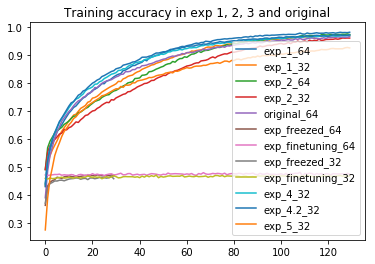

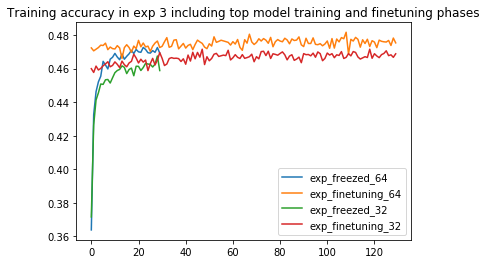

In [114]:
%matplotlib inline

plt.plot(exp_1_history_64['acc'][:130], label='exp_1_64')
plt.plot(exp_1_history_32['acc'][:130], label='exp_1_32')

plt.plot(exp_2_history_64['acc'], label='exp_2_64')
plt.plot(exp_2_history_32['acc'], label='exp_2_32')

plt.plot(original_history_64['acc'][:130], label='original_64')

plt.plot(exp_3_history_freezed_64['acc'], label='exp_freezed_64')
plt.plot(exp_3_history_finetuning_64['acc'], label='exp_finetuning_64')

plt.plot(exp_3_history_freezed_32['acc'], label='exp_freezed_32')
plt.plot(exp_3_history_finetuning_32['acc'], label='exp_finetuning_32')

plt.plot(exp_4_history_32['acc'], label='exp_4_32')
plt.plot(exp_42_history_32['acc'], label='exp_4.2_32')
plt.plot(exp_5_history_32['acc'], label='exp_5_32')

plt.legend()
plt.title('Training accuracy in exp 1, 2, 3 and original')
plt.show()

plt.plot(exp_3_history_freezed_64['acc'], label='exp_freezed_64')
plt.plot(exp_3_history_finetuning_64['acc'], label='exp_finetuning_64')

plt.plot(exp_3_history_freezed_32['acc'], label='exp_freezed_32')
plt.plot(exp_3_history_finetuning_32['acc'], label='exp_finetuning_32')

plt.legend()
plt.title('Training accuracy in exp 3 including top model training and finetuning phases')
plt.show()

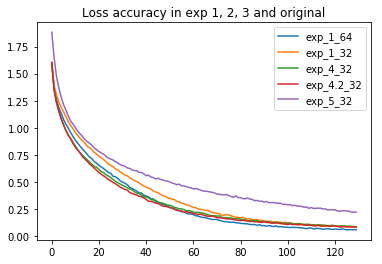

In [116]:
%matplotlib inline

plt.plot(exp_1_history_64['loss'][:130], label='exp_1_64')
plt.plot(exp_1_history_32['loss'][:130], label='exp_1_32')

# plt.plot(exp_2_history_64['loss'], label='exp_2_64')
# plt.plot(exp_2_history_32['loss'], label='exp_2_32')

# plt.plot(original_history_64['loss'][:130], label='original_64')

# plt.plot(exp_3_history_freezed_64['loss'], label='exp_freezed_64')
# plt.plot(exp_3_history_finetuning_64['loss'], label='exp_finetuning_64')

# plt.plot(exp_3_history_freezed_32['loss'], label='exp_freezed_32')
# plt.plot(exp_3_history_finetuning_32['loss'], label='exp_finetuning_32')

plt.plot(exp_4_history_32['loss'], label='exp_4_32')
plt.plot(exp_42_history_32['loss'], label='exp_4.2_32')
plt.plot(exp_5_history_32['loss'], label='exp_5_32')

plt.legend()
plt.title('Loss accuracy in exp 1, 2, 3 and original')
plt.show()


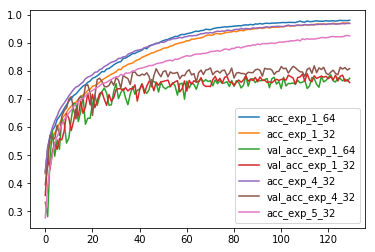

In [112]:
plt.plot(exp_1_history_64['acc'][:130], label='acc_exp_1_64')
plt.plot(exp_1_history_32['acc'][:130], label='acc_exp_1_32')

plt.plot(exp_1_history_64['val_acc'][:130], label='val_acc_exp_1_64')
plt.plot(exp_1_history_32['val_acc'][:130], label='val_acc_exp_1_32')

plt.plot(exp_4_history_32['acc'][:130], label='acc_exp_4_32')
plt.plot(exp_4_history_32['val_acc'][:130], label='val_acc_exp_4_32')

plt.plot(exp_5_history_32['acc'][:130], label='acc_exp_5_32')
plt.legend()
plt.show()

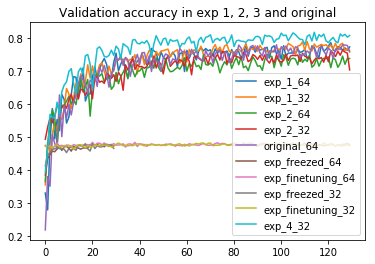

In [109]:
plt.plot(exp_1_history_64['val_acc'][:130], label='exp_1_64')
plt.plot(exp_1_history_32['val_acc'][:130], label='exp_1_32')

plt.plot(exp_2_history_64['val_acc'], label='exp_2_64')
plt.plot(exp_2_history_32['val_acc'], label='exp_2_32')

plt.plot(original_history_64['val_acc'][:130], label='original_64')

plt.plot(exp_3_history_freezed_64['val_acc'], label='exp_freezed_64')
plt.plot(exp_3_history_finetuning_64['val_acc'], label='exp_finetuning_64')

plt.plot(exp_3_history_freezed_32['val_acc'], label='exp_freezed_32')
plt.plot(exp_3_history_finetuning_32['val_acc'], label='exp_finetuning_32')

plt.plot(exp_4_history_32['val_acc'], label='exp_4_32')

plt.legend()
plt.title('Validation accuracy in exp 1, 2, 3 and original')
plt.show()

| Experiment    |   Batch size  |Execution time  | Test accuracy  | Test loss          |
|---------------|---------------|----------------|----------------|--------------------|
| 1             | 64            | 5872.4862      | 0.7924         | 1.0228634945854813 |
| 1             | 32            | n/a            | 0.795          | 0.9464669375022655 |
| 2             | 64            | 2565.0550      | 0.7529         | 1.0389897839899291 |
| 2             | 32            | n/a            | 0.7734         | 0.9581621086956785 |
| 3 (top model) | 64            | 335.1360       | n/a            | n/a                |
| 3 (fine-tune) | 64            | 1442.6925      | 0.4761         | 1.497175493601896  |
| 3 (top model) | 32            | 415.1236       | n/a            | n/a                |
| 3 (fine-tune) | 32            | 752.4261       | 0.4778         | 1.4958488912238042 |